In [2]:
import pandas as pd
import numpy as np
import scipy
import datetime

# models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# metrics
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score 

#helpers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dataset - Mushroom

In [3]:
# Import Datasets
mushroom_df = pd.read_csv('data/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Frequency distribution of habitat classes
pd.crosstab(index=mushroom_df["habitat"], columns="count")

col_0,count
habitat,
d,3148
g,2148
l,832
m,292
p,1144
u,368
w,192


In [5]:
# Create feature and target dataframes
# - apply one-hot encoding to categorical columns
# - separate the feature and target data
feature_cols = mushroom_df.columns.drop('habitat')
feature_df = pd.get_dummies(mushroom_df[feature_cols])
target_outcome = mushroom_df['habitat']

mush_final = pd.get_dummies(mushroom_df)

In [6]:
mush_rescaled = preprocessing.normalize(mush_final)

# Clustering

## k-means clustering

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.18032497195138614
For n_clusters = 3 The average silhouette_score is : 0.2283228677395134
For n_clusters = 4 The average silhouette_score is : 0.2297354470566609
For n_clusters = 5 The average silhouette_score is : 0.2602123143919099
For n_clusters = 6 The average silhouette_score is : 0.27730679273884495
For n_clusters = 7 The average silhouette_score is : 0.2842411951100424
For n_clusters = 8 The average silhouette_score is : 0.3009593029181605
For n_clusters = 9 The average silhouette_score is : 0.30900912219948223
For n_clusters = 10 The average silhouette_score is : 0.25375275015256477


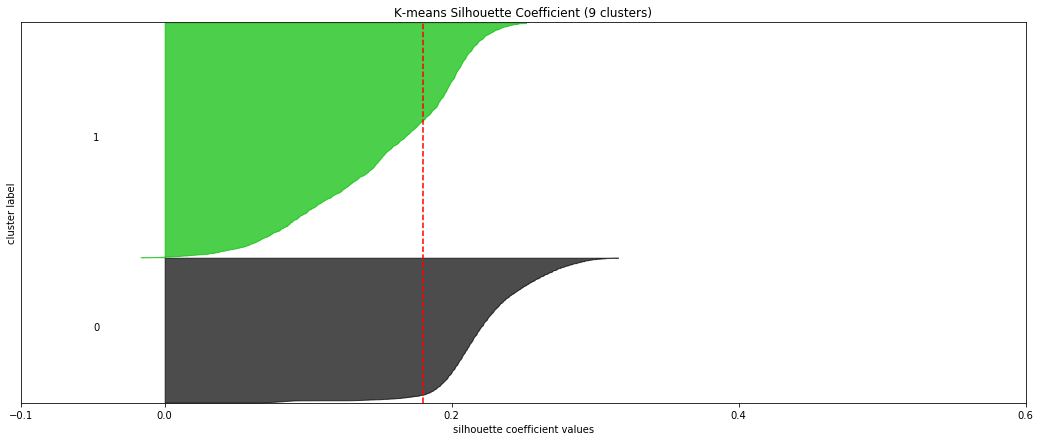

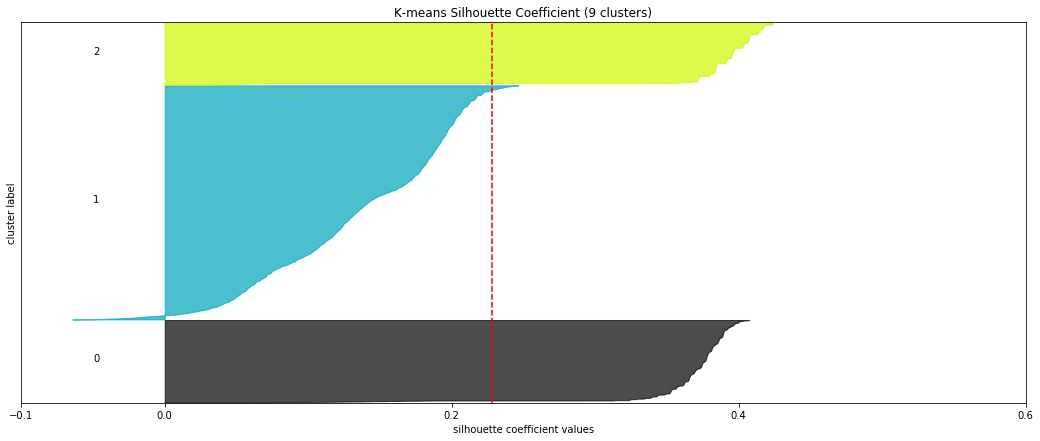

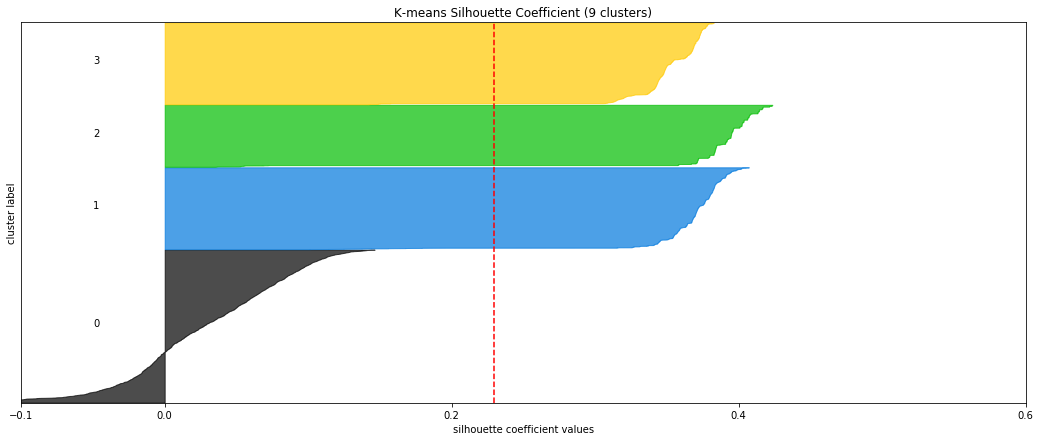

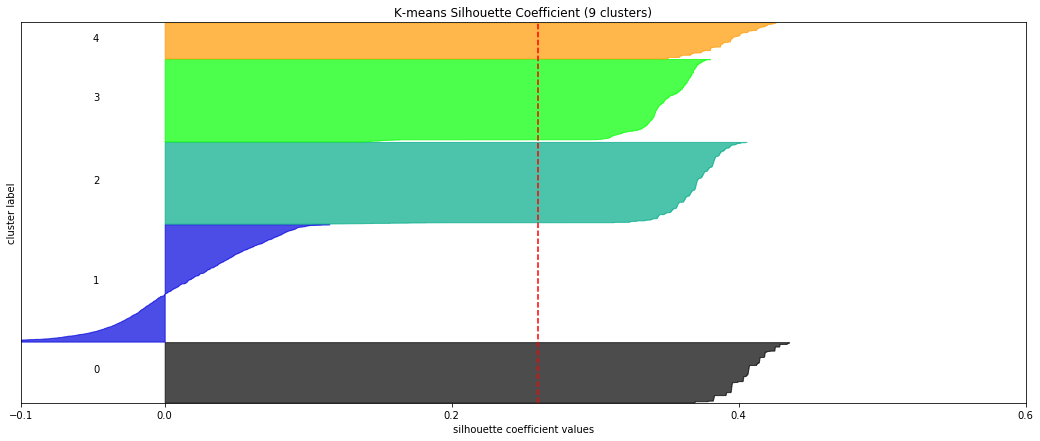

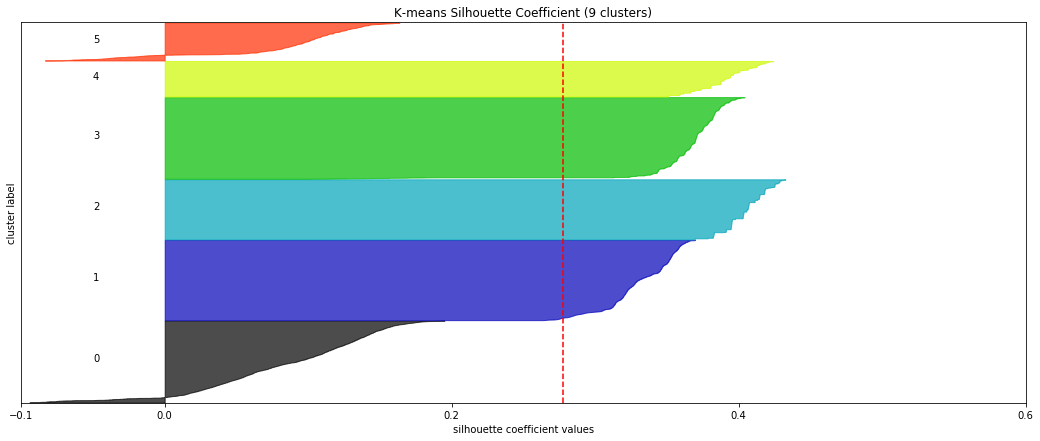

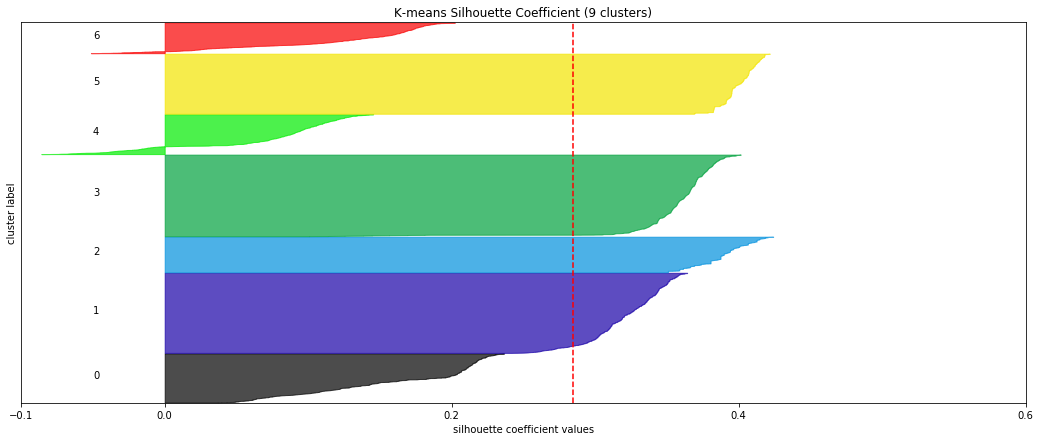

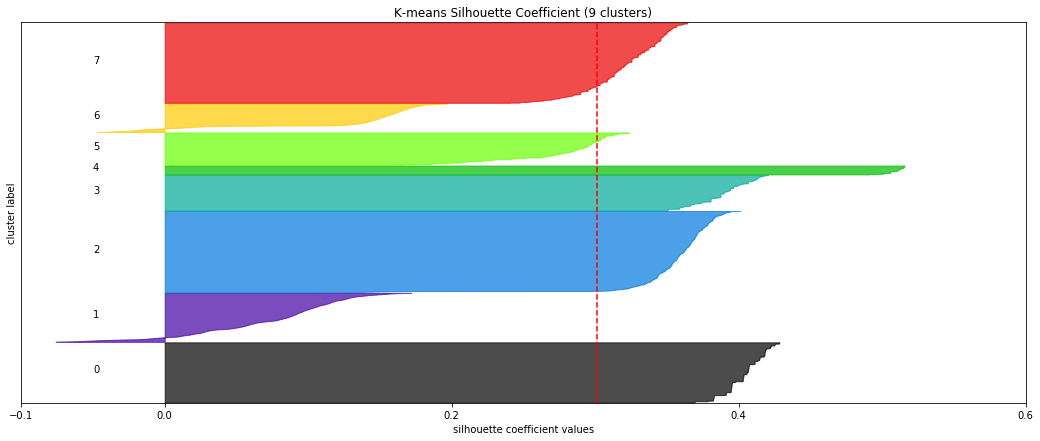

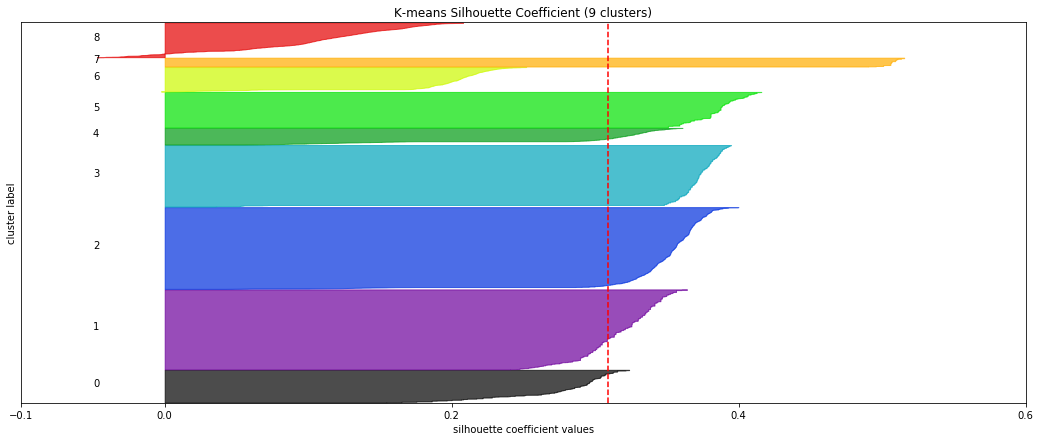

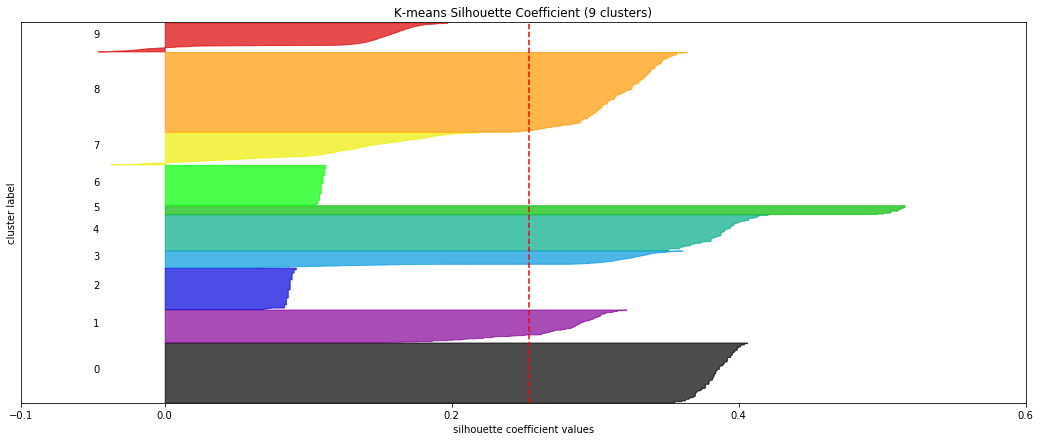

In [448]:
X = mush_rescaled
kmeans_sil = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0.6])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    kmeans_sil[n_clusters] = silhouette_avg
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("K-means Silhouette Coefficient (9 clusters)")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


plt.show()

In [452]:
clusterer = GaussianMixture(n_components=8, random_state=10)
cluster_labels = clusterer.fit_predict(mush_rescaled)


In [453]:
len(cluster_labels)

8124

In [454]:
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,1
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,1
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,1
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,0


In [455]:
mushroom_df['cluster'] = cluster_labels

In [456]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'cluster'],
      dtype='object')

In [457]:
for col in mushroom_df.columns:
    print(mushroom_df.groupby([col,'cluster']).cluster.count())

class  cluster
e      0           896
       1          1728
       2           336
       5          1056
       6           192
p      0           816
       2            76
       3          1296
       4           864
       7           864
Name: cluster, dtype: int64
cap-shape  cluster
b          0          294
           2           14
           5           96
           6           48
c          0            2
           2            2
f          0          486
           1          864
           2          146
           3          648
           4          288
           5          384
           6           48
           7          288
k          0            2
           2          106
           4          288
           5           96
           6           48
           7          288
s          0           32
x          0          896
           1          864
           2          144
           3          648
           4          288
           5          480
      

In [ ]:
w = sapply(c(2:10), function(x) cor(a[,1], a[,x], method = "pearson", use = 'pairwise.complete.obs') )


In [449]:
# Davies Bouldin Score
X = mush_rescaled
kmeans_db = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    kmeans_db[n_clusters] = davies_bouldin_avg
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 2.090628923792367
For n_clusters = 3 The average davies_bouldin_score is : 1.5432988117367217
For n_clusters = 4 The average davies_bouldin_score is : 1.8197483771018779
For n_clusters = 5 The average davies_bouldin_score is : 1.8011585432924213
For n_clusters = 6 The average davies_bouldin_score is : 1.8506259831492053
For n_clusters = 7 The average davies_bouldin_score is : 1.8809044557350043
For n_clusters = 8 The average davies_bouldin_score is : 1.7140915371848817
For n_clusters = 9 The average davies_bouldin_score is : 1.610694784311928
For n_clusters = 10 The average davies_bouldin_score is : 1.9141110982414222


Text(0.5, 1.0, 'K-means: Davies-Bouldin Score by Number of Clusters')

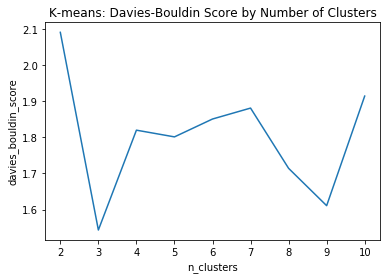

In [451]:
km_db_df = pd.DataFrame(kmeans_db.values(), index=kmeans_db.keys()).reset_index().rename(columns={0: "davies_bouldin_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="davies_bouldin_score", data=km_db_df)
ax.set_title("K-means: Davies-Bouldin Score by Number of Clusters")

## Expectation Maximization
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.kaggle.com/charel/learn-by-example-expectation-maximization

For n_clusters = 2 The average silhouette_score is : 0.16171757922663937
For n_clusters = 4 The average silhouette_score is : 0.2301959169286131
For n_clusters = 5 The average silhouette_score is : 0.2602636414815196
For n_clusters = 6 The average silhouette_score is : 0.27730679273884495
For n_clusters = 7 The average silhouette_score is : 0.2803444427590367
For n_clusters = 8 The average silhouette_score is : 0.22040907021244255
For n_clusters = 9 The average silhouette_score is : 0.16707766634920193


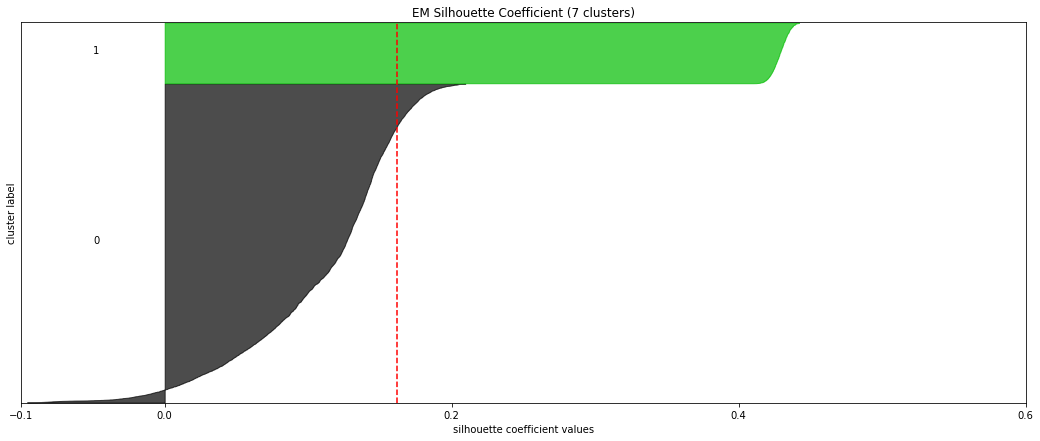

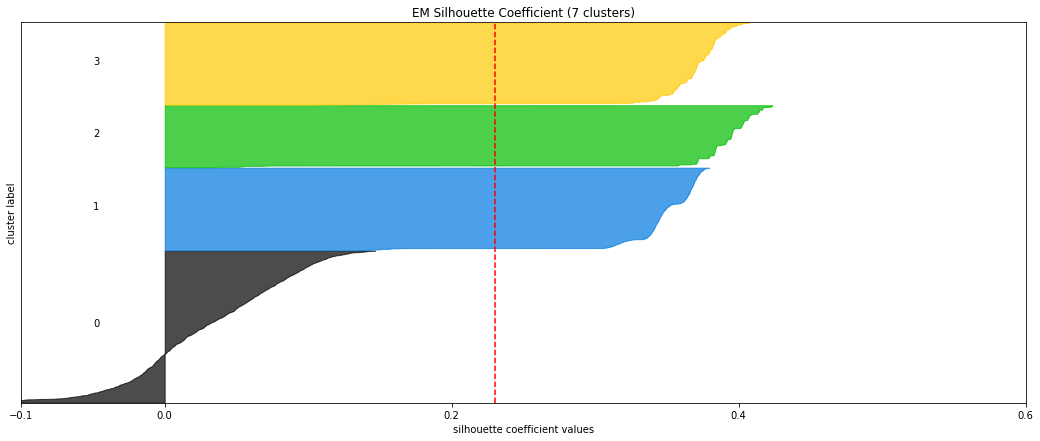

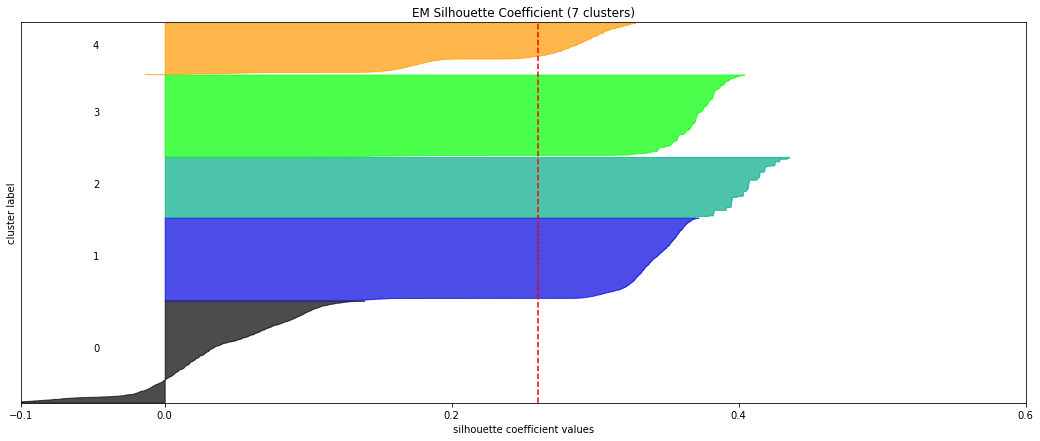

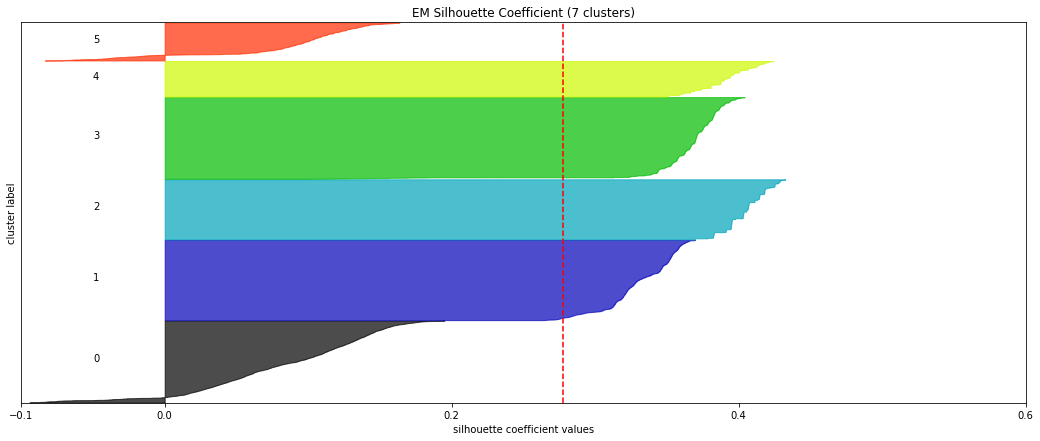

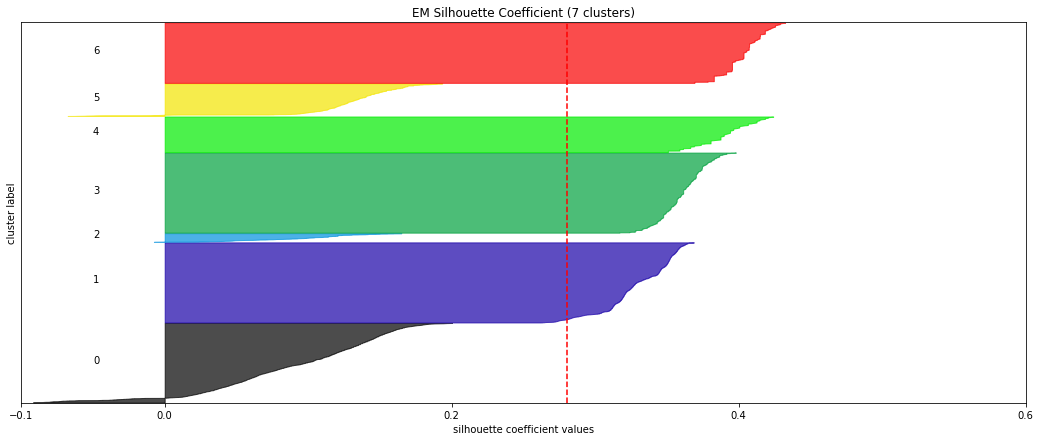

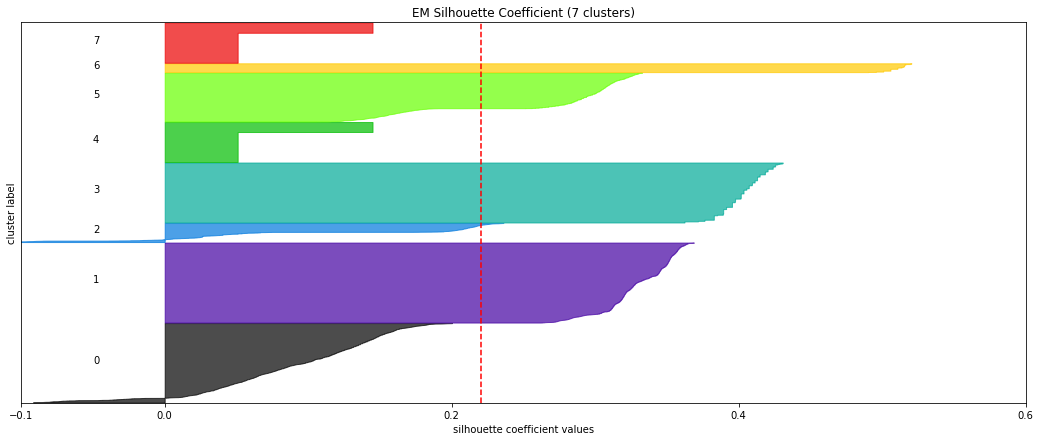

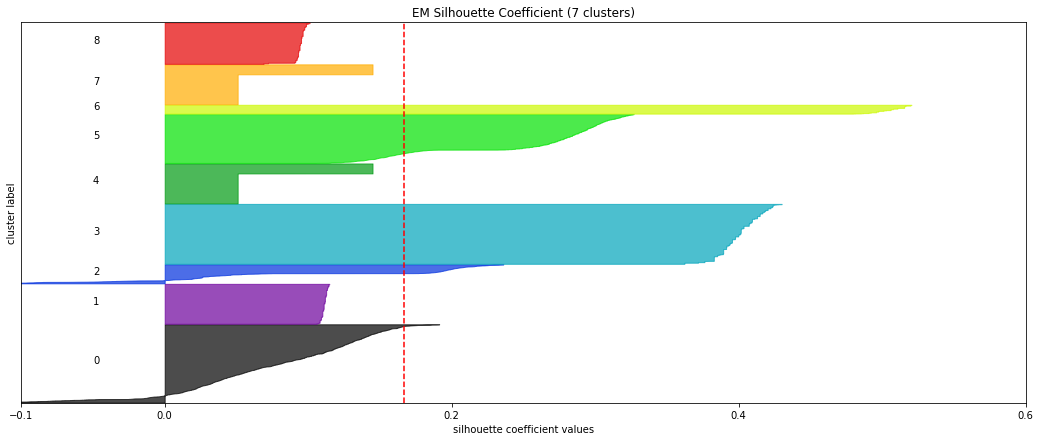

In [460]:
X = mush_rescaled
em_sil = {}

range_n_clusters = [2, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0.6])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    em_sil[n_clusters] = silhouette_avg
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("EM Silhouette Coefficient (7 clusters)")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])

plt.show()

Text(0.5, 1.0, 'EM: Silhouette Score by Number of Clusters')

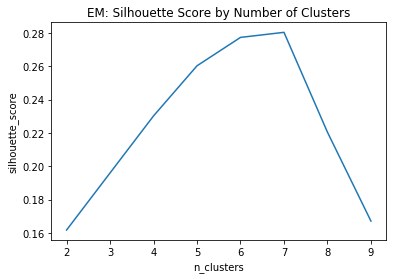

In [459]:
em_sil_df = pd.DataFrame(em_sil.values(), index=em_sil.keys()).reset_index().rename(columns={0: "silhouette_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="silhouette_score", data=em_sil_df)
ax.set_title("EM: Silhouette Score by Number of Clusters")

In [456]:
# Davies Bouldin Score
X = mush_rescaled
em_db = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    em_db[n_clusters] = davies_bouldin_avg

    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 1.5913287944314094
For n_clusters = 3 The average davies_bouldin_score is : 2.1216509632974803
For n_clusters = 4 The average davies_bouldin_score is : 1.8259582905165637
For n_clusters = 5 The average davies_bouldin_score is : 1.8752512326052766
For n_clusters = 6 The average davies_bouldin_score is : 1.8506259831492053
For n_clusters = 7 The average davies_bouldin_score is : 1.9169807306498305
For n_clusters = 8 The average davies_bouldin_score is : 2.22934062987116
For n_clusters = 9 The average davies_bouldin_score is : 2.4206270037726823
For n_clusters = 10 The average davies_bouldin_score is : 2.3255167026616728
For n_clusters = 11 The average davies_bouldin_score is : 2.2326295235398024


Text(0.5, 1.0, 'EM: Davies-Bouldin Score by Number of Clusters')

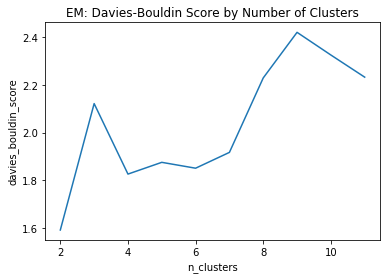

In [457]:
em_db_df = pd.DataFrame(em_db.values(), index=em_db.keys()).reset_index().rename(columns={0: "davies_bouldin_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="davies_bouldin_score", data=em_db_df)
ax.set_title("EM: Davies-Bouldin Score by Number of Clusters")

# Dimensionality Reduction

In [7]:
def select_n_components(model):
    cum_var = np.cumsum(model.explained_variance_ratio_)
    return next(x for x, val in enumerate(cum_var)if val > 0.9) + 1

## PCA
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

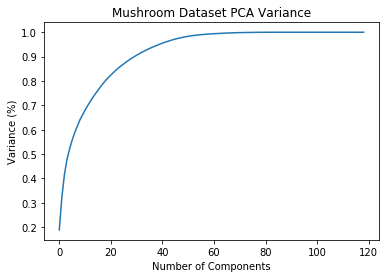

In [210]:
pca = PCA().fit(mush_rescaled)
plt.figure()
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Mushroom Dataset PCA Variance')
plt.show()

In [211]:
X_train_pca = pca.transform(mush_rescaled)

X_projected = pca.inverse_transform(X_train_pca)

loss = ((X_train_pca - X_projected) ** 2).mean()

In [212]:
pca_num_components = select_n_components(pca)

In [213]:
pca_num_components

31

## ICA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

1) Loop where n_components is 1 up to num_features_for_clustering-1

2)   fastICA(n_components).

3)   x_transform = fastICA.fit_transform(x).

4)   kurtosis_vals = scipy.stats.kurtosis(x_transform). 

5)   Get the means of all kurtosis_vals[i]*kurtosis_vals[i] (to avoid neg and pos cancelling each other).

6) Pick the n_components with the biggest mean kurtosis... i.e. most kurtotic.

In [83]:
mush_ica = {}

for num in range(3,119):
    ica = FastICA(n_components=num)
    x_transform = ica.fit_transform(mush_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    mush_ica[num] = np.mean(kurtosis_vals*kurtosis_vals)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

In [171]:
mush_ica_df['kurtosis'] = mush_ica_df['kurtosis']**(1/2)

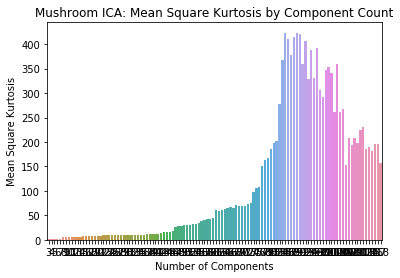

In [173]:
# mush_ica_df = pd.DataFrame(mush_ica.values(), index=range(3,119)).reset_index().rename(columns={'index': 'n_components', 0: 'kurtosis'})

ax = sns.barplot(x="n_components", y="kurtosis", data=mush_ica_df)
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Kurtosis') #for each component
plt.title('Mushroom ICA: Mean Square Kurtosis by Component Count')
plt.show()

In [89]:
most_kurtotic = max(mush_ica, key=mush_ica.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
ica_num_components = most_kurtotic
mush_ica[most_kurtotic]

most kurtotic n_components: 85


179198.08056831633

## Randomized Projections
- https://scikit-learn.org/stable/modules/random_projection.html

In [464]:
count = 0
kurt_mush_rp = []

In [477]:
scipy.stats.mode(kurt_mush_rp)

ModeResult(mode=array([9]), count=array([4]))

In [471]:
for i in range(0,100):
    mush_rp = {}

    for num in range(3,119):
        srp = GaussianRandomProjection(n_components=num)
        x_transform = srp.fit_transform(mush_rescaled)
        kurtosis_vals = scipy.stats.kurtosis(x_transform)
        mush_rp[num] = np.mean(kurtosis_vals*kurtosis_vals)


    most_kurtotic = max(mush_rp, key=mush_rp.get)
    print("most kurtotic n_components: {}".format(most_kurtotic))
    rp_num_components = most_kurtotic
    mush_rp[most_kurtotic]
    kurt_mush_rp.append(rp_num_components)

most kurtotic n_components: 24
most kurtotic n_components: 16
most kurtotic n_components: 4
most kurtotic n_components: 10
most kurtotic n_components: 28
most kurtotic n_components: 25
most kurtotic n_components: 33
most kurtotic n_components: 4
most kurtotic n_components: 62
most kurtotic n_components: 40
most kurtotic n_components: 29
most kurtotic n_components: 16
most kurtotic n_components: 83
most kurtotic n_components: 87
most kurtotic n_components: 61
most kurtotic n_components: 5
most kurtotic n_components: 70
most kurtotic n_components: 61
most kurtotic n_components: 111
most kurtotic n_components: 22
most kurtotic n_components: 6
most kurtotic n_components: 39
most kurtotic n_components: 25
most kurtotic n_components: 52
most kurtotic n_components: 38
most kurtotic n_components: 38
most kurtotic n_components: 5
most kurtotic n_components: 51
most kurtotic n_components: 9
most kurtotic n_components: 85
most kurtotic n_components: 20
most kurtotic n_components: 10
most kurtotic

Text(0.5, 1.0, 'Mushroom RP: Most Kurtotic Component Counts')

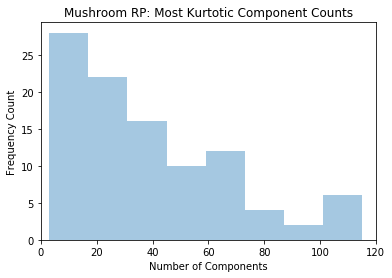

In [486]:
ax = sns.distplot(kurt_mush_rp[0:100], kde = False)
ax.set_xlim([0,120])
plt.xlabel('Number of Components')
plt.ylabel('Frequency Count') #for each component
plt.title('Mushroom RP: Most Kurtotic Component Counts')


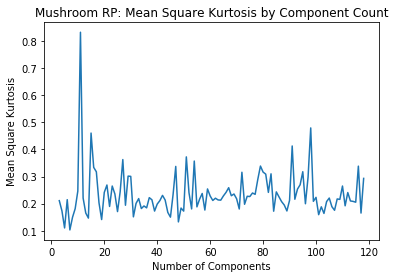

In [462]:
mush_rp_df = pd.DataFrame(mush_rp.values(), index=range(3,119)).reset_index().rename(columns={'index': 'n_components', 0: 'kurtosis'})

ax = sns.lineplot(x="n_components", y="kurtosis", data=mush_rp_df)
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Kurtosis') #for each component
plt.title('Mushroom RP: Mean Square Kurtosis by Component Count')
plt.show()

most kurtotic n_components: 11


0.832264680114984

## Linear Discriminant Analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [216]:
X_scaled = preprocessing.normalize(feature_df)

In [217]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, target_outcome)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [136]:
lda.classes_

array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype='<U1')

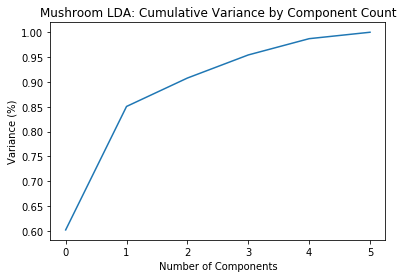

In [135]:
plt.figure()
sns.lineplot(data=np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Mushroom LDA: Cumulative Variance by Component Count')
plt.show()

In [300]:
lda_num_components = select_n_components(lda)

# Clustering after Dimensionality Reduction

- for [PCA, ICA, Randomized Projections, LDA]
    - apply [KMeans, EM]

In [209]:
print(pca_num_components)
print(ica_num_components)

31
241


In [214]:
dim_reduce = {'pca': PCA(n_components=31), # variance
                'ica': FastICA(n_components=85), # kurtosis
                'rp': GaussianRandomProjection(n_components=7), # kurtosis
                'lda': LinearDiscriminantAnalysis(n_components=3)} # variance

cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
              'em': GaussianMixture(n_components=7, random_state=10)}

In [221]:
mush_results = {'kmeans': {}, 
                'em': {}}


for dr_name, dr_func in dim_reduce.items():
    if dr_name == 'lda':
        dr_dims = dr_func.fit_transform(X_scaled, target_outcome)
    else:
        dr_dims = dr_func.fit_transform(mush_rescaled)
        
    for c_name, c_func in cluster.items():
        cluster_labels = c_func.fit_predict(dr_dims)
        silhouette_avg = silhouette_score(dr_dims, cluster_labels)
        print("The average silhouette_score for {} {} is :".format(c_name, dr_name), silhouette_avg)
        mush_results[c_name][dr_name] = silhouette_avg

The average silhouette_score for kmeans pca is : 0.2850054883116023
The average silhouette_score for em pca is : 0.31783142731195907
The average silhouette_score for kmeans ica is : -0.026022816285731193
The average silhouette_score for em ica is : -0.015204896465332228
The average silhouette_score for kmeans rp is : 0.24283079321484835
The average silhouette_score for em rp is : 0.21502005162894405
The average silhouette_score for kmeans lda is : 0.8342392388580321
The average silhouette_score for em lda is : 0.755653515031125


In [498]:
m_together = pd.DataFrame(columns=['dr_algorithm', 'silhouette_score', 'clustering_algorithm'])

for k,v in mush_results.items():
    df = pd.DataFrame(mush_results[k].values(), mush_results[k].keys(), columns=['silhouette_score']).reset_index().rename(columns={'index': 'dr_algorithm'})
    df['clustering_algorithm'] = k
    m_together = m_together.append(df)
    
    

In [499]:
m_together

,dr_algorithm,silhouette_score,clustering_algorithm
0,pca,0.285005,kmeans
1,ica,-0.026023,kmeans
2,rp,0.242831,kmeans
3,lda,0.834239,kmeans
0,pca,0.317831,em
1,ica,-0.015205,em
2,rp,0.215020,em
3,lda,0.755654,em


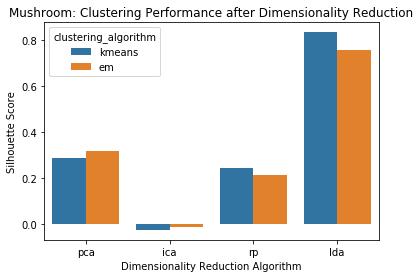

In [256]:
ax = sns.barplot(x="dr_algorithm", y="silhouette_score", hue="clustering_algorithm", data=together)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Mushroom: Clustering Performance after Dimensionality Reduction')
plt.show()

In [261]:
km_tog = together[together.clustering_algorithm == 'kmeans']

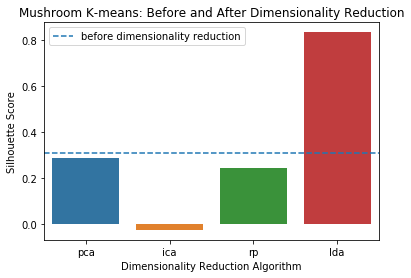

In [272]:
ax = sns.barplot(x="dr_algorithm", y="silhouette_score", data=km_tog)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Mushroom K-means: Before and After Dimensionality Reduction')
plt.axhline(kb_sil_score, linestyle="dashed",label="before dimensionality reduction")
plt.legend()
plt.show()

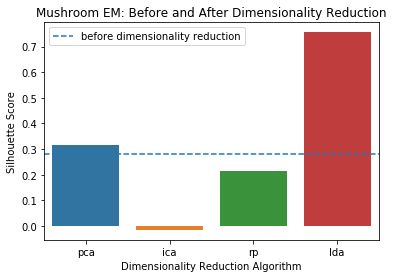

In [273]:
em_tog = together[together.clustering_algorithm == 'em']

ax = sns.barplot(x="dr_algorithm", y="silhouette_score", data=em_tog)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Mushroom EM: Before and After Dimensionality Reduction')
plt.axhline(eb_sil_score, linestyle="dashed",label="before dimensionality reduction")
plt.legend()
plt.show()

In [225]:
kb_cluster_labels = cluster['kmeans'].fit_predict(mush_rescaled)
silhouette_avg = silhouette_score(mush_rescaled, kb_cluster_labels)
kb_sil_score = silhouette_avg
kb_sil_score

0.30900912219948223

In [226]:
eb_cluster_labels = cluster['em'].fit_predict(mush_rescaled)
silhouette_avg = silhouette_score(mush_rescaled, eb_cluster_labels)
eb_sil_score = silhouette_avg
eb_sil_score

0.2803444427590367

# Dataset - Kiva

In [48]:

# Import Datasets
kiva_df = pd.read_csv('data/kiva_loans.csv')
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [49]:
# Frequency distribution of sector classes
pd.crosstab(index=kiva_df["sector"], columns="count")

col_0,count
sector,
Agriculture,180302
Arts,12060
Clothing,32742
Construction,6268
Education,31013
Entertainment,830
Food,136657
Health,9223
Housing,33731


In [50]:
# Add new `days_to_fund` feature
kiva_df['days_to_fund'] = (pd.to_datetime(kiva_df.funded_time) - pd.to_datetime(kiva_df.posted_time)).dt.days
kiva_df = kiva_df[kiva_df.days_to_fund >= 0]

In [51]:
# Add new count features `female_borrowers` and `male_borrowers`

def recipient_genders(x):
    lst = x.replace(" ", "").split(',') if not pd.isna(x) else []
    return lst.count('female'), lst.count('male')

gender_counts = kiva_df.borrower_genders.apply(recipient_genders).str
kiva_df.loc[:, 'female_borrowers'] = gender_counts[0]
kiva_df.loc[:, 'male_borrowers'] = gender_counts[1]

In [52]:
# Add target feature `is_agricultural_loan` to dataframe
kiva_df['is_agricultural_loan'] = np.where(kiva_df['sector']=='Agriculture', True, False)

In [53]:
# Select a subset of features to exclude timeseries data
rel_cols = ['days_to_fund', 'funded_amount', 'loan_amount', 'term_in_months', 'repayment_interval','female_borrowers', 'male_borrowers', 'activity', 'country', 'is_agricultural_loan']
kiva_subset = kiva_df[rel_cols].copy()
kiva_subset.head()

,days_to_fund,funded_amount,loan_amount,term_in_months,repayment_interval,female_borrowers,male_borrowers,activity,country,is_agricultural_loan
0,1.0,300.0,300.0,12.0,irregular,1,0,Fruits & Vegetables,Pakistan,False
1,1.0,575.0,575.0,11.0,irregular,2,0,Rickshaw,Pakistan,False
2,0.0,150.0,150.0,43.0,bullet,1,0,Transportation,India,False
3,0.0,200.0,200.0,11.0,irregular,1,0,Embroidery,Pakistan,False
4,0.0,400.0,400.0,14.0,monthly,1,0,Milk Sales,Pakistan,False


In [54]:
# In order to reduce training times, I sampled 50,000 rows from the data
kiva_subset = kiva_subset.sample(n=50000, random_state=1)

In [55]:
# Create feature and target dataframes
# - apply one-hot encoding to categorical columns
# - separate the feature and target data
kiva_feature_cols = kiva_subset.drop(columns = ['is_agricultural_loan']).columns
kiva_features = pd.get_dummies(kiva_subset[kiva_feature_cols], prefix='', prefix_sep='')
kiva_target = kiva_subset[['is_agricultural_loan']]
kiva_final = pd.get_dummies(kiva_subset, prefix='', prefix_sep='')

In [56]:
kiva_rescaled = preprocessing.normalize(kiva_final)

In [57]:
kiva_subset.groupby('activity').count()

,days_to_fund,funded_amount,loan_amount,term_in_months,repayment_interval,female_borrowers,male_borrowers,country,is_agricultural_loan
activity,,,,,,,,,
Agriculture,1955,1955,1955,1955,1955,1955,1955,1955,1955
Air Conditioning,4,4,4,4,4,4,4,4,4
Animal Sales,668,668,668,668,668,668,668,668,668
Aquaculture,7,7,7,7,7,7,7,7,7
Arts,83,83,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...
Water Distribution,52,52,52,52,52,52,52,52,52
Weaving,224,224,224,224,224,224,224,224,224
Wedding Expenses,20,20,20,20,20,20,20,20,20


# Clustering

## k-means clustering

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.9439588625565394
For n_clusters = 3 The average silhouette_score is : 0.5814218656318736
For n_clusters = 4 The average silhouette_score is : 0.5339213072004364
For n_clusters = 5 The average silhouette_score is : 0.5031884261836829
For n_clusters = 6 The average silhouette_score is : 0.4420725007698766


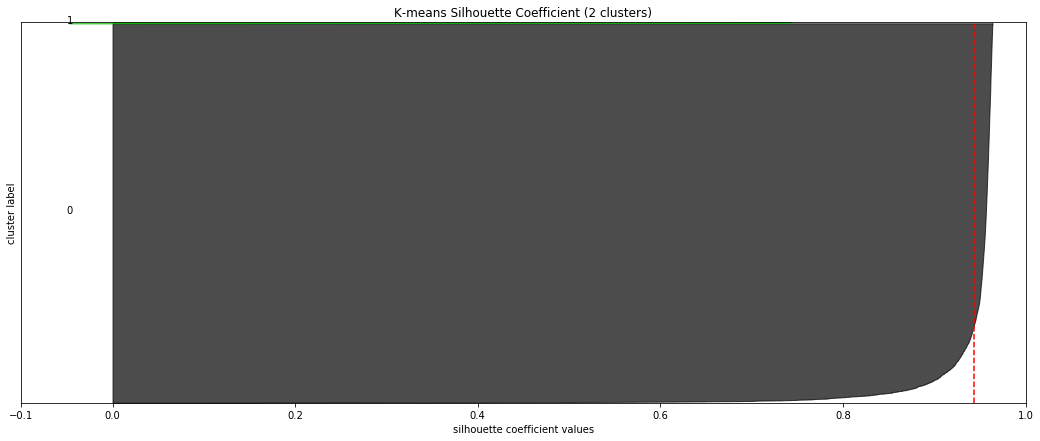

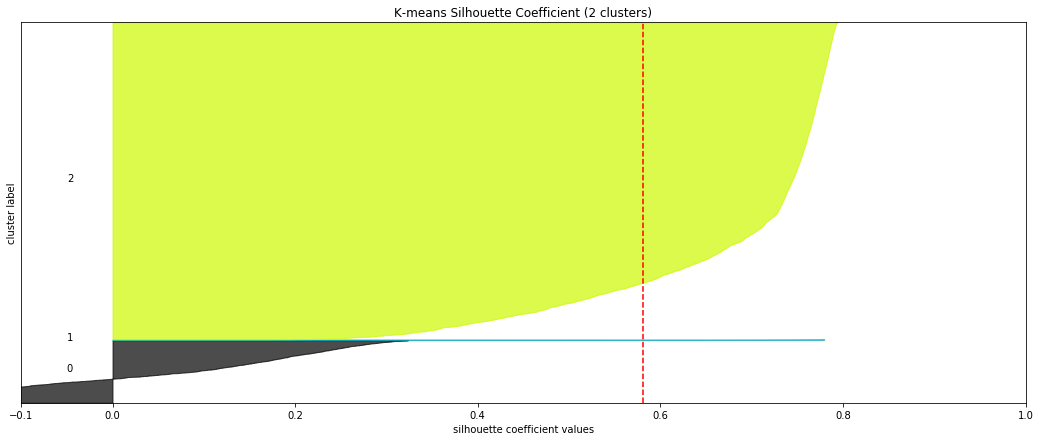

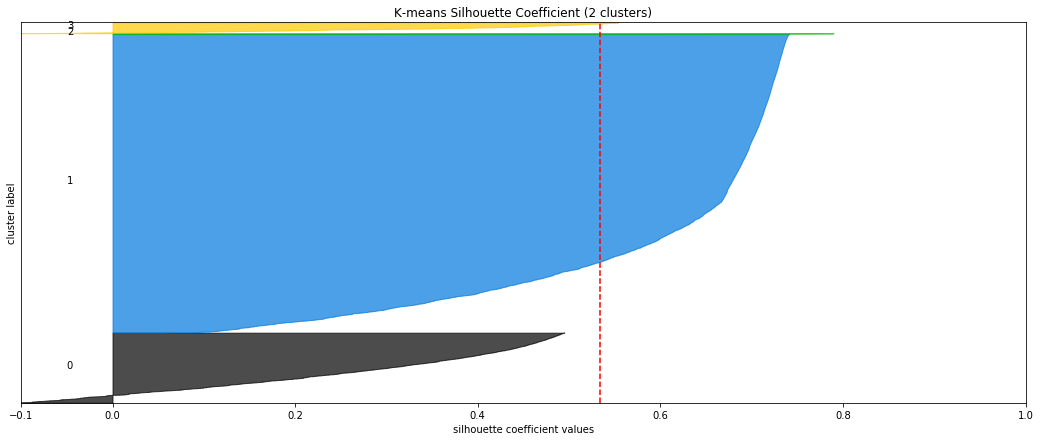

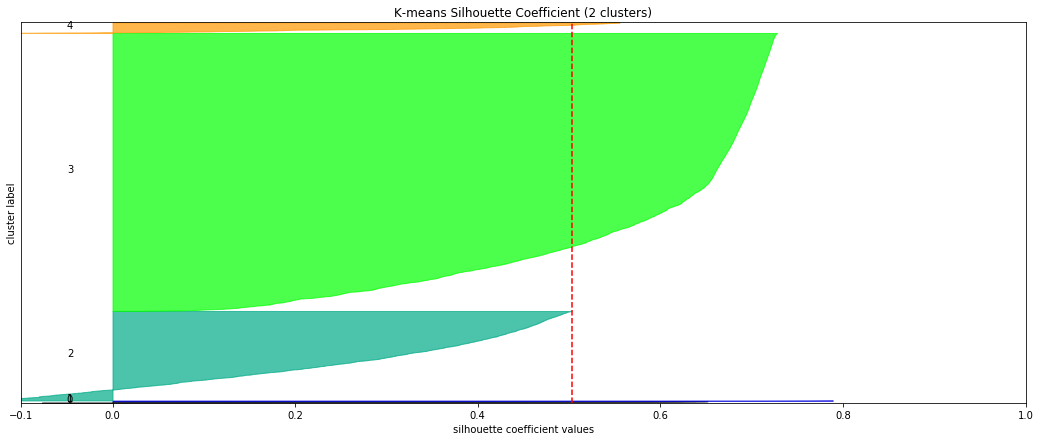

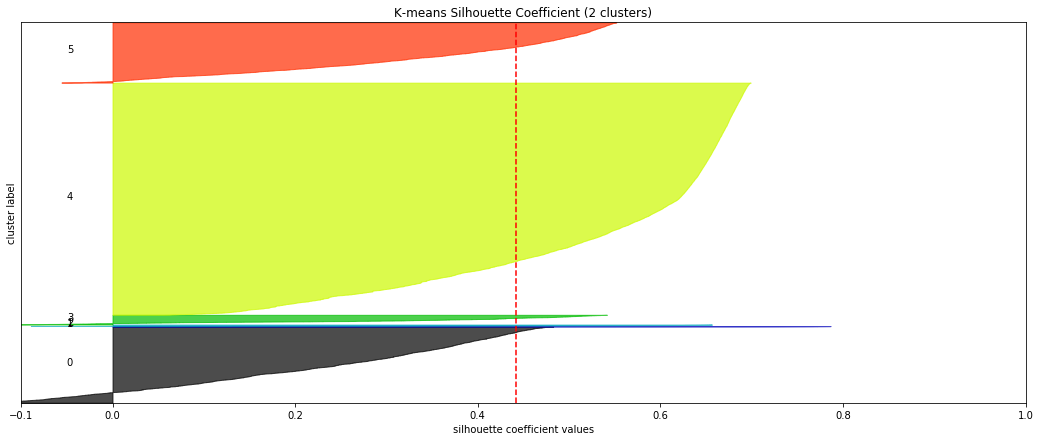

In [471]:
X = kiva_rescaled
kmeans_sil_kiva = {}

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    kmeans_sil_kiva[n_clusters] = silhouette_avg
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("K-means Silhouette Coefficient (2 clusters)")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Text(0.5, 1.0, 'K-means: Silhouette Score by Number of Clusters')

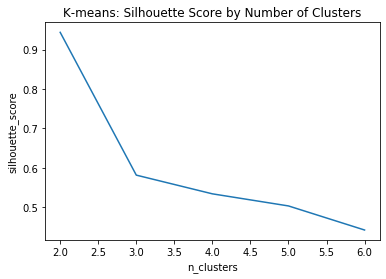

In [472]:
kmeans_sil_df_kiva = pd.DataFrame(kmeans_sil_kiva.values(), index=kmeans_sil_kiva.keys()).reset_index().rename(columns={0: "silhouette_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="silhouette_score", data=kmeans_sil_df_kiva)
ax.set_title("K-means: Silhouette Score by Number of Clusters")

In [474]:
# Davies Bouldin Score
X = kiva_rescaled
kmeans_db_kiva = {}

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    kmeans_db_kiva[n_clusters] = davies_bouldin_avg
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 0.3278395495174846
For n_clusters = 3 The average davies_bouldin_score is : 0.8042698624737857
For n_clusters = 4 The average davies_bouldin_score is : 0.6823157528594592
For n_clusters = 5 The average davies_bouldin_score is : 0.675741853344247
For n_clusters = 6 The average davies_bouldin_score is : 0.7272935381954463


Text(0.5, 1.0, 'K-means: Davies-Bouldin Score by Number of Clusters')

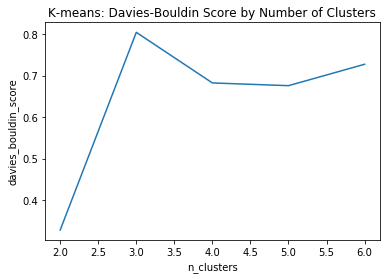

In [476]:
kmeans_db_df_kiva = pd.DataFrame(kmeans_db_kiva.values(), index=kmeans_db_kiva.keys()).reset_index().rename(columns={0: "davies_bouldin_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="davies_bouldin_score", data=kmeans_db_df_kiva)
ax.set_title("K-means: Davies-Bouldin Score by Number of Clusters")

## Expectation Maximization
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.kaggle.com/charel/learn-by-example-expectation-maximization

For n_clusters = 2 The average silhouette_score is : 0.7386873668775786
For n_clusters = 3 The average silhouette_score is : 0.5792876775789385
For n_clusters = 4 The average silhouette_score is : 0.4628686635955095
For n_clusters = 5 The average silhouette_score is : 0.4805195417312234
For n_clusters = 6 The average silhouette_score is : 0.3679888517357394


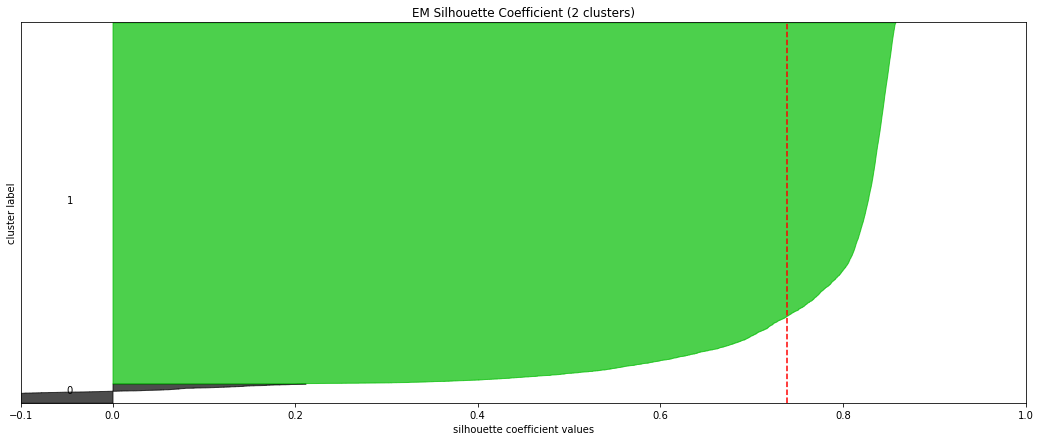

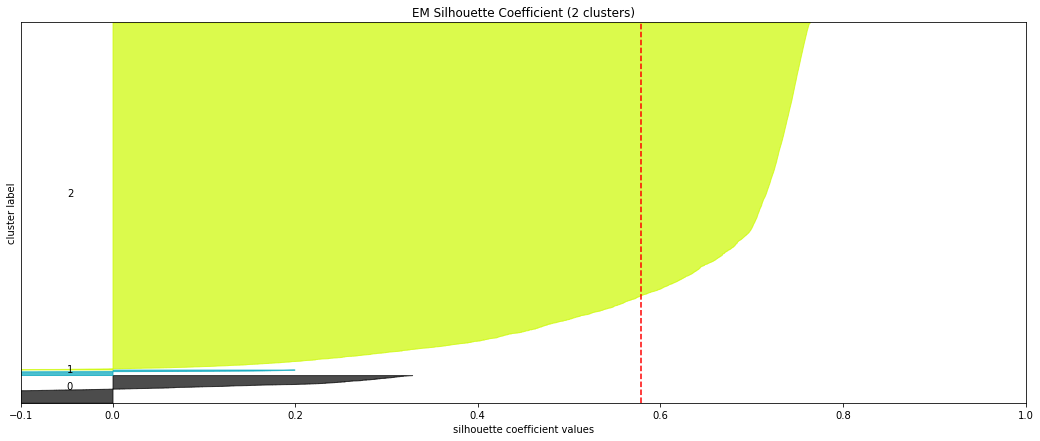

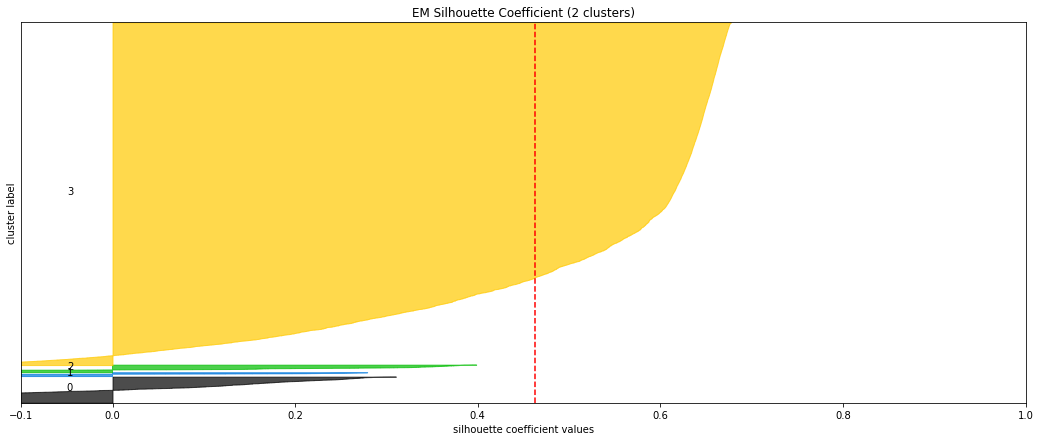

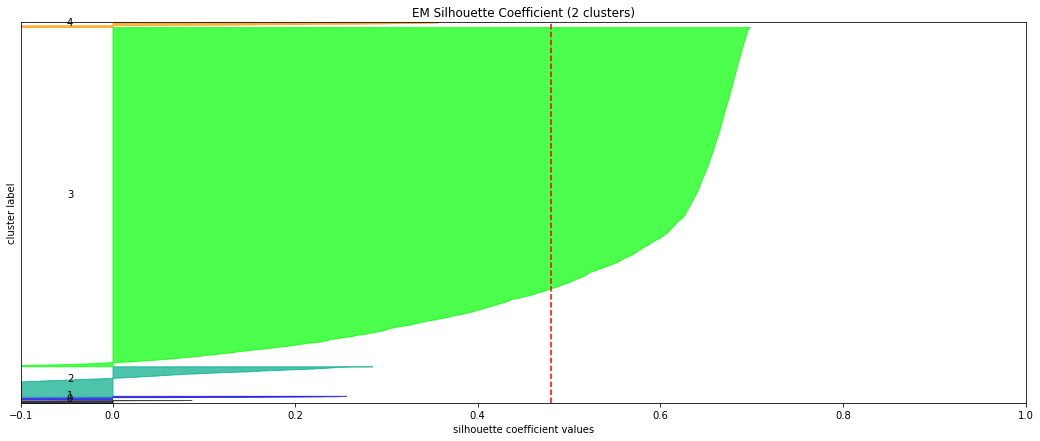

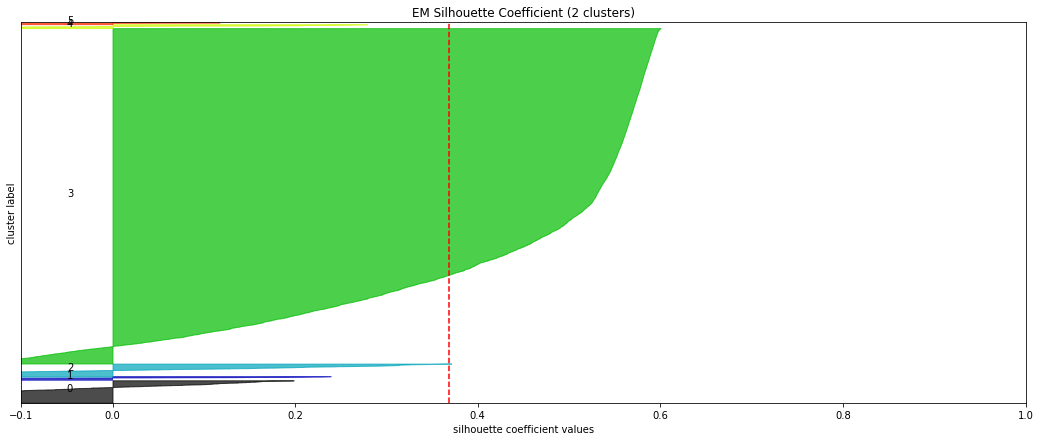

In [477]:
X = kiva_rescaled
em_sil_kiva = {}

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    em_sil_kiva[n_clusters] = silhouette_avg
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("EM Silhouette Coefficient (2 clusters)")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Text(0.5, 1.0, 'EM: Silhouette Score by Number of Clusters')

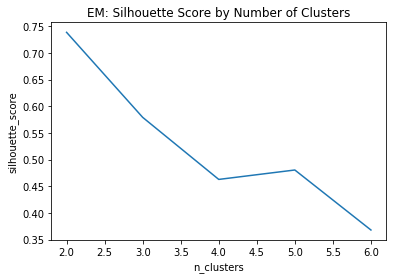

In [478]:
em_sil_df_kiva = pd.DataFrame(em_sil_kiva.values(), index=em_sil_kiva.keys()).reset_index().rename(columns={0: "silhouette_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="silhouette_score", data=em_sil_df_kiva)
ax.set_title("EM: Silhouette Score by Number of Clusters")

In [480]:
# Davies Bouldin Score
X = kiva_rescaled
em_db_kiva = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    em_db_kiva[n_clusters] = davies_bouldin_avg
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 1.2531096227038532
For n_clusters = 3 The average davies_bouldin_score is : 1.3961644875363781
For n_clusters = 4 The average davies_bouldin_score is : 1.3130445404108322
For n_clusters = 5 The average davies_bouldin_score is : 2.1595280045731555
For n_clusters = 6 The average davies_bouldin_score is : 2.1384217085685466
For n_clusters = 7 The average davies_bouldin_score is : 2.4853695799975806
For n_clusters = 8 The average davies_bouldin_score is : 4.053811037332244
For n_clusters = 9 The average davies_bouldin_score is : 3.9313021489399773


Text(0.5, 1.0, 'EM: Davies-Bouldin Score by Number of Clusters')

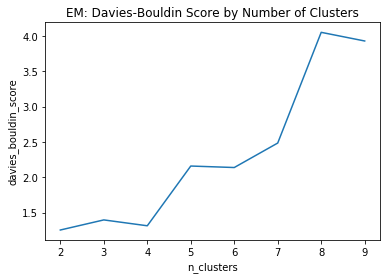

In [481]:
em_db_df_kiva = pd.DataFrame(em_db_kiva.values(), index=em_db_kiva.keys()).reset_index().rename(columns={0: "davies_bouldin_score", 'index': 'n_clusters'})

ax = sns.lineplot(x="n_clusters", y="davies_bouldin_score", data=em_db_df_kiva)
ax.set_title("EM: Davies-Bouldin Score by Number of Clusters")



# Dimensionality Reduction

In [58]:
def select_n_components(model):
    cum_var = np.cumsum(model.explained_variance_ratio_)
    return next(x for x, val in enumerate(cum_var)if val > 0.9) + 1

## PCA
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

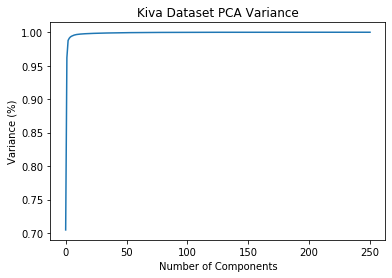

In [274]:
pca_kiva = PCA().fit(kiva_rescaled)
plt.figure()
plt.plot(np.cumsum(pca_kiva.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kiva Dataset PCA Variance')
plt.show()

In [275]:
pca_mush_df = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).reset_index().rename(columns={0: 'variance', 'index': 'n_components'})
pca_mush_df['dataset'] = 'mushroom'
pca_kiva_df = pd.DataFrame(np.cumsum(pca_kiva.explained_variance_ratio_)).reset_index().rename(columns={0: 'variance', 'index': 'n_components'})
pca_kiva_df['dataset'] = 'kiva'

pca_final = pd.concat([pca_mush_df, pca_kiva_df])

In [276]:
X_train_pca = pca_kiva.transform(kiva_rescaled)

X_projected = pca_kiva.inverse_transform(X_train_pca)

loss = ((X_train_pca - X_projected) ** 2).mean()

In [277]:
print(loss)

0.003980981434332338


Text(0.5, 1.0, 'PCA Cumulative Variance by Component Count')

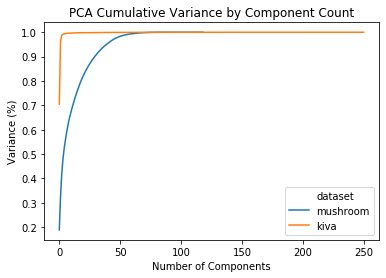

In [278]:
ax = sns.lineplot(x="n_components", y="variance", hue="dataset",
                  data=pca_final)

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Cumulative Variance by Component Count')

In [282]:
pca_num_components = select_n_components(pca_kiva)
print(pca_num_components)

2


## ICA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

1) Loop where n_components is 1 up to num_features_for_clustering-1

2)   fastICA(n_components).

3)   x_transform = fastICA.fit_transform(x).

4)   kurtosis_vals = scipy.stats.kurtosis(x_transform). 

5)   Get the means of all kurtosis_vals[i]*kurtosis_vals[i] (to avoid neg and pos cancelling each other).

6) Pick the n_components with the biggest mean kurtosis... i.e. most kurtotic.

In [181]:
# kiva_ica = {}

for num in range(242,251):
    ica = FastICA(n_components=num)
    x_transform = ica.fit_transform(kiva_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    kiva_ica[num] = np.mean(kurtosis_vals*kurtosis_vals)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


KeyboardInterrupt: 

In [182]:
kiva_ica

{3: 204265.62868575405,
 4: 147570.996942391,
 5: 118308.49712268624,
 6: 101881.44843940064,
 7: 88059.57178473232,
 8: 78020.84339709172,
 9: 69777.73256110185,
 10: 64525.209908374236,
 11: 58743.4512880037,
 12: 55752.61084378602,
 13: 51482.35360749934,
 14: 50390.6785889128,
 15: 48280.791802159154,
 16: 49542.58290130214,
 17: 47581.90744650653,
 18: 48137.76881157677,
 19: 51281.60632627024,
 20: 56583.46895699635,
 21: 56302.5522459647,
 22: 60108.59053718736,
 23: 71030.61119913413,
 24: 55345.41138646306,
 25: 64662.42268674904,
 26: 64454.91704901667,
 27: 63499.860435310744,
 28: 62241.04649752724,
 29: 76242.05288879569,
 30: 63065.382749257835,
 31: 87998.36605269909,
 32: 139068.76272606797,
 33: 160504.67033620056,
 34: 250631.92169189794,
 35: 281026.6231138315,
 36: 283899.6041654393,
 37: 266105.2517749963,
 38: 250811.07742487674,
 39: 236819.31157741742,
 40: 318738.8265980588,
 41: 305003.77037883404,
 42: 280061.39034944365,
 43: 539070.1891391577,
 44: 594097.8

In [183]:
import pickle
with open('data/kiva_ica.pickle', 'wb') as handle:
    pickle.dump(kiva_ica, handle, protocol=pickle.HIGHEST_PROTOCOL)

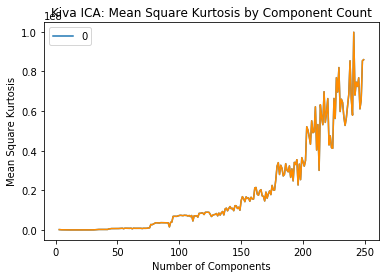

In [186]:
pd.DataFrame(kiva_ica.values(), index=range(3,250)).plot()

kiva_ica_df = pd.DataFrame(kiva_ica.values(), index=range(3,250)).reset_index().rename(columns={'index': 'n_components', 0: 'kurtosis'})

ax = sns.lineplot(x="n_components", y="kurtosis", data=kiva_ica_df, color='darkorange')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Kurtosis') #for each component
plt.title('Kiva ICA: Mean Square Kurtosis by Component Count')
plt.show()

In [187]:
most_kurtotic = max(kiva_ica, key=kiva_ica.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
ica_num_components = most_kurtotic
kiva_ica[most_kurtotic]

most kurtotic n_components: 241


99716479.11040431

## Randomized Projections
- https://scikit-learn.org/stable/modules/random_projection.html

In [488]:
kiva_rp_dist = []

In [489]:
for i in range(0,100):

    kiva_rp = {}

    for num in range(3,251):
        srp = GaussianRandomProjection(n_components=num)
        x_transform = srp.fit_transform(kiva_rescaled)
        kurtosis_vals = scipy.stats.kurtosis(x_transform)
        kiva_rp[num] = np.mean(kurtosis_vals*kurtosis_vals)
        
    most_kurtotic = max(kiva_rp, key=kiva_rp.get)
    print("most kurtotic n_components: {}".format(most_kurtotic))
    rp_num_components = most_kurtotic
    kiva_rp[most_kurtotic]
    kiva_rp_dist.append(rp_num_components)

most kurtotic n_components: 19
most kurtotic n_components: 8
most kurtotic n_components: 22
most kurtotic n_components: 17
most kurtotic n_components: 21
most kurtotic n_components: 5
most kurtotic n_components: 9
most kurtotic n_components: 28
most kurtotic n_components: 9
most kurtotic n_components: 19
most kurtotic n_components: 18
most kurtotic n_components: 9
most kurtotic n_components: 50
most kurtotic n_components: 4
most kurtotic n_components: 85
most kurtotic n_components: 30
most kurtotic n_components: 13
most kurtotic n_components: 8
most kurtotic n_components: 3
most kurtotic n_components: 6
most kurtotic n_components: 19
most kurtotic n_components: 12
most kurtotic n_components: 10
most kurtotic n_components: 3
most kurtotic n_components: 3
most kurtotic n_components: 4
most kurtotic n_components: 8
most kurtotic n_components: 12
most kurtotic n_components: 13
most kurtotic n_components: 3
most kurtotic n_components: 9
most kurtotic n_components: 4
most kurtotic n_componen

KeyboardInterrupt: 

Text(0.5, 1.0, 'Kiva RP: Most Kurtotic Component Counts')

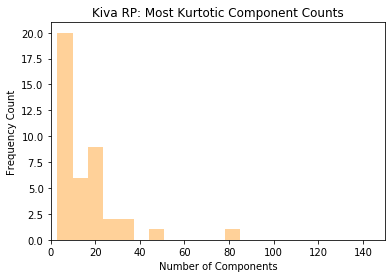

In [496]:
ax = sns.distplot(kiva_rp_dist[0:100], kde = False, color='darkorange')
ax.set_xlim([0,150])
plt.xlabel('Number of Components')
plt.ylabel('Frequency Count') #for each component
plt.title('Kiva RP: Most Kurtotic Component Counts')

In [495]:
scipy.stats.mode(kiva_rp_dist)

ModeResult(mode=array([9]), count=array([5]))

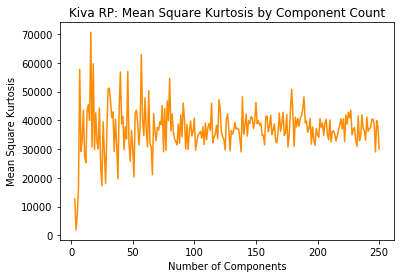

In [108]:
kiva_rp_df = pd.DataFrame(kiva_rp.values(), index=range(3,251)).reset_index().rename(columns={'index': 'n_components', 0: 'kurtosis'})

ax = sns.lineplot(x="n_components", y="kurtosis", data=kiva_rp_df, color='darkorange')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Kurtosis') #for each component
plt.title('Kiva RP: Mean Square Kurtosis by Component Count')
plt.show()

most kurtotic n_components: 16


70638.93457709988

## Linear Discriminant Analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [365]:
X_scaled = preprocessing.normalize(kiva_features)

In [290]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, kiva_target.is_agricultural_loan)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

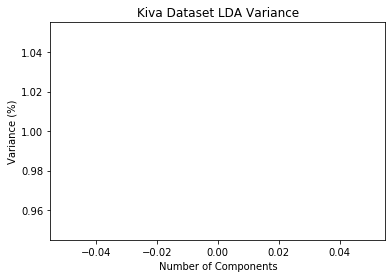

In [286]:
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kiva Dataset LDA Variance')
plt.show()

In [287]:
lda_num_components = select_n_components(lda)
print(lda_num_components)

1


# Clustering after Dimensionality Reduction

- for [PCA, ICA, Randomized Projections, LDA]
    - apply [KMeans, EM]

In [291]:
dim_reduce = {'pca': PCA(n_components=2), # variance
                'ica': FastICA(n_components=241), # kurtosis
                'rp': GaussianRandomProjection(n_components=16), # kurtosis
                'lda': LinearDiscriminantAnalysis(n_components=1)} # variance

cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
              'em': GaussianMixture(n_components=7, random_state=10)}

In [292]:
kiva_results = {'kmeans': {}, 
                'em': {}}


for dr_name, dr_func in dim_reduce.items():
    if dr_name == 'lda':
        dr_dims = dr_func.fit_transform(X_scaled, kiva_target.is_agricultural_loan)
    else:
        dr_dims = dr_func.fit_transform(kiva_rescaled)
        
    for c_name, c_func in cluster.items():
        cluster_labels = c_func.fit_predict(dr_dims)
        silhouette_avg = silhouette_score(dr_dims, cluster_labels)
        print("The average silhouette_score for {} {} is :".format(c_name, dr_name), silhouette_avg)
        kiva_results[c_name][dr_name] = silhouette_avg

The average silhouette_score for kmeans pca is : 0.40050091361830475
The average silhouette_score for em pca is : 0.3707927913002846
The average silhouette_score for kmeans ica is : -0.08864860737187287
The average silhouette_score for em ica is : -0.05443575959679425
The average silhouette_score for kmeans rp is : 0.39317163898710356
The average silhouette_score for em rp is : 0.38788233629259294
The average silhouette_score for kmeans lda is : 0.5266733525432823
The average silhouette_score for em lda is : 0.5391900513803943


In [299]:
together = pd.DataFrame(columns=['dr_algorithm', 'silhouette_score', 'clustering_algorithm'])

for k,v in kiva_results.items():
    df = pd.DataFrame(kiva_results[k].values(), kiva_results[k].keys(), columns=['silhouette_score']).reset_index().rename(columns={'index': 'dr_algorithm'})
    df['clustering_algorithm'] = k
    together = together.append(df)
    
    

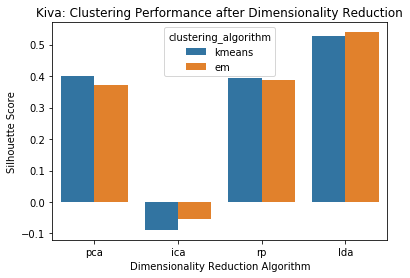

In [300]:
ax = sns.barplot(x="dr_algorithm", y="silhouette_score", hue="clustering_algorithm", data=together)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Kiva: Clustering Performance after Dimensionality Reduction')
plt.show()

In [301]:
km_tog = together[together.clustering_algorithm == 'kmeans']

In [302]:
kb_cluster_labels = cluster['kmeans'].fit_predict(kiva_rescaled)
silhouette_avg = silhouette_score(kiva_rescaled, kb_cluster_labels)
kb_sil_score = silhouette_avg
kb_sil_score

0.3785857973913083

In [303]:
eb_cluster_labels = cluster['em'].fit_predict(kiva_rescaled)
silhouette_avg = silhouette_score(kiva_rescaled, eb_cluster_labels)
eb_sil_score = silhouette_avg
eb_sil_score

0.35652238690080734

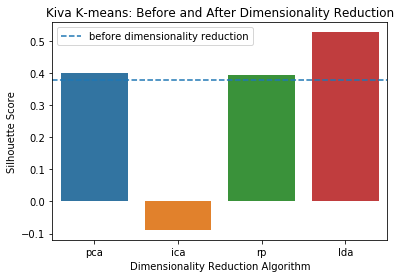

In [304]:
ax = sns.barplot(x="dr_algorithm", y="silhouette_score", data=km_tog)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Kiva K-means: Before and After Dimensionality Reduction')
plt.axhline(kb_sil_score, linestyle="dashed",label="before dimensionality reduction")
plt.legend()
plt.show()

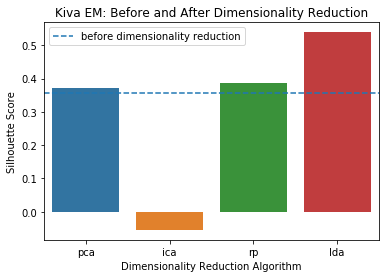

In [305]:
em_tog = together[together.clustering_algorithm == 'em']

ax = sns.barplot(x="dr_algorithm", y="silhouette_score", data=em_tog)
plt.xlabel('Dimensionality Reduction Algorithm')
plt.ylabel('Silhouette Score') #for each component
plt.title('Kiva EM: Before and After Dimensionality Reduction')
plt.axhline(eb_sil_score, linestyle="dashed",label="before dimensionality reduction")
plt.legend()
plt.show()

# Neural Network Learner with Dimensionality Reduction (One Dataset)


In [315]:
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## PCA

In [316]:
# dim_reduce = {'pca': PCA(n_components=2), # variance
#                 'ica': FastICA(n_components=241), # kurtosis
#                 'rp': GaussianRandomProjection(n_components=16), # kurtosis
#                 'lda': LinearDiscriminantAnalysis(n_components=1)} # variance

# cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
#               'em': GaussianMixture(n_components=7, random_state=10)}
kiva_features = pd.DataFrame(PCA(n_components=2).fit_transform(kiva_rescaled))

In [317]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(kiva_features, kiva_target, test_size=0.20, random_state=42)

In [318]:
len(kiva_features.columns)


2

In [319]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [326]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [327]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [332]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.580266,0.732441,0.580411,0.731667,0
1,0.580330,0.732265,0.580625,0.731833,1
2,0.580183,0.732382,0.581257,0.731667,2
3,0.580316,0.732324,0.580068,0.731667,3
4,0.580283,0.732412,0.579719,0.731667,4
5,0.580314,0.732471,0.580216,0.731833,5
6,0.580247,0.732324,0.580210,0.732000,6
7,0.580392,0.732294,0.580249,0.731667,7
8,0.580455,0.732382,0.580537,0.732000,8
9,0.580246,0.732441,0.580134,0.732000,9


In [338]:
plotter = tfdocs.plots.HistoryPlotter()

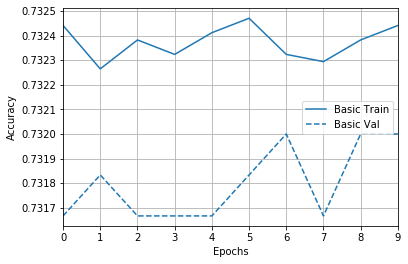

In [341]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

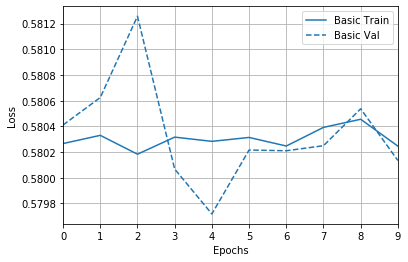

In [335]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")

## ICA

In [342]:
# dim_reduce = {'pca': PCA(n_components=2), # variance
#                 'ica': FastICA(n_components=241), # kurtosis
#                 'rp': GaussianRandomProjection(n_components=16), # kurtosis
#                 'lda': LinearDiscriminantAnalysis(n_components=1)} # variance

# cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
#               'em': GaussianMixture(n_components=7, random_state=10)}
kiva_features = pd.DataFrame(FastICA(n_components=241).fit_transform(kiva_rescaled))

In [343]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(kiva_features, kiva_target, test_size=0.20, random_state=42)

In [344]:
len(kiva_features.columns)


241

In [347]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(241,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [348]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [349]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [350]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.125441,0.949971,0.018971,0.994000,0
1,0.014876,0.995559,0.006204,0.998333,1
2,0.008846,0.997118,0.004371,0.998167,2
3,0.007471,0.997324,0.001771,0.999500,3
4,0.008226,0.997559,0.001456,0.999667,4
5,0.006947,0.997971,0.001644,1.000000,5
6,0.005941,0.998088,0.048596,0.986333,6
7,0.006437,0.998235,0.001443,0.999333,7
8,0.005673,0.998441,0.007645,0.997500,8
9,0.004993,0.998765,0.001887,0.999333,9


In [351]:
plotter = tfdocs.plots.HistoryPlotter()

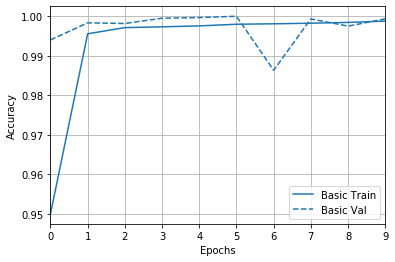

In [352]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

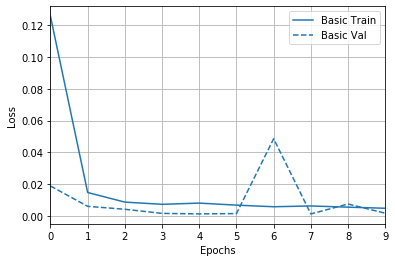

In [353]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")

## RP

In [354]:
# dim_reduce = {'pca': PCA(n_components=2), # variance
#                 'ica': FastICA(n_components=241), # kurtosis
#                 'rp': GaussianRandomProjection(n_components=16), # kurtosis
#                 'lda': LinearDiscriminantAnalysis(n_components=1)} # variance

# cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
#               'em': GaussianMixture(n_components=7, random_state=10)}
kiva_features = pd.DataFrame(GaussianRandomProjection(n_components=16).fit_transform(kiva_rescaled))

In [355]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(kiva_features, kiva_target, test_size=0.20, random_state=42)

In [356]:
len(kiva_features.columns)


16

In [357]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(16,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [358]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [359]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [360]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.583119,0.731500,0.583687,0.731833,0
1,0.582279,0.731647,0.583632,0.731833,1
2,0.581830,0.731647,0.580294,0.731833,2
3,0.581007,0.731824,0.580423,0.732333,3
4,0.580230,0.732235,0.579177,0.732333,4
5,0.579843,0.732588,0.579075,0.732000,5
6,0.579354,0.732471,0.577947,0.732500,6
7,0.579212,0.732529,0.577332,0.732500,7
8,0.578190,0.731941,0.577235,0.732667,8
9,0.578032,0.732500,0.574196,0.733167,9


In [361]:
plotter = tfdocs.plots.HistoryPlotter()

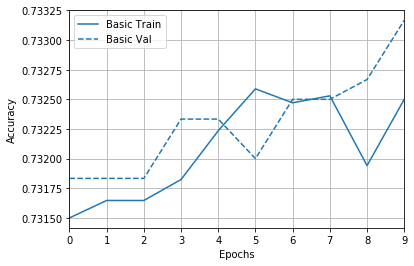

In [362]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

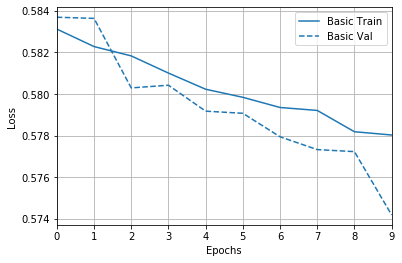

In [363]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")

## LDA

In [366]:
# dim_reduce = {'pca': PCA(n_components=2), # variance
#                 'ica': FastICA(n_components=241), # kurtosis
#                 'rp': GaussianRandomProjection(n_components=16), # kurtosis
#                 'lda': LinearDiscriminantAnalysis(n_components=1)} # variance

# cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
#               'em': GaussianMixture(n_components=7, random_state=10)}
kiva_features = pd.DataFrame(LinearDiscriminantAnalysis(n_components=1).fit_transform(X_scaled, kiva_target.is_agricultural_loan))

In [367]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(kiva_features, kiva_target, test_size=0.20, random_state=42)

In [368]:
len(kiva_features.columns)


1

In [369]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [370]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [371]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [372]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.251637,0.880882,0.250549,0.877833,0
1,0.248265,0.882029,0.245695,0.887833,1
2,0.248020,0.881059,0.251808,0.882000,2
3,0.247995,0.881441,0.245351,0.885500,3
4,0.247120,0.881059,0.247460,0.883000,4
5,0.247347,0.881206,0.245458,0.884500,5
6,0.247190,0.881500,0.246660,0.884000,6
7,0.247012,0.881853,0.247245,0.884500,7
8,0.246910,0.881382,0.245331,0.884667,8
9,0.246819,0.880824,0.246580,0.880833,9


In [373]:
plotter = tfdocs.plots.HistoryPlotter()

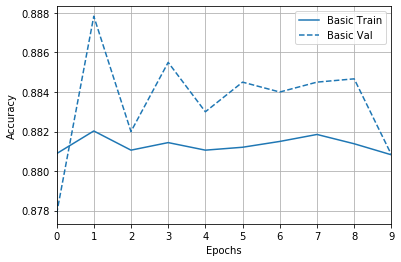

In [374]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

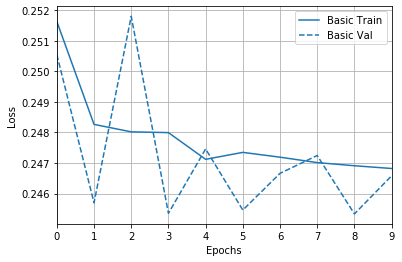

In [375]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")

# Neural Network Learner with Clustering (One Dataset)


In [376]:
# cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
#               'em': GaussianMixture(n_components=7, random_state=10)

## K-means

In [381]:
km_clusters = KMeans(n_clusters=9, random_state=10).fit_predict(kiva_features)

In [382]:
X_train, X_test, y_train, y_test = train_test_split(km_clusters, kiva_target, test_size=0.20, random_state=42)

In [387]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [388]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [389]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [390]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.491620,0.784765,0.419639,0.809333,0
1,0.408213,0.807029,0.366562,0.809333,1
2,0.341434,0.815265,0.315585,0.822667,2
3,0.310787,0.827029,0.296386,0.832500,3
4,0.300747,0.829382,0.315645,0.834333,4
5,0.297700,0.831500,0.292780,0.834333,5
6,0.297182,0.832676,0.290954,0.834833,6
7,0.296493,0.832059,0.296916,0.834333,7
8,0.295499,0.831941,0.290500,0.834333,8
9,0.295353,0.831353,0.290700,0.834333,9


In [391]:
plotter = tfdocs.plots.HistoryPlotter()

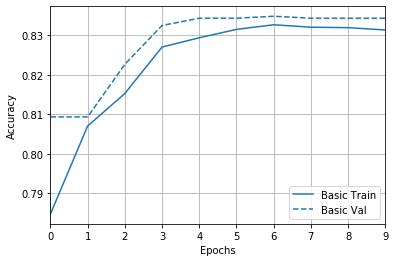

In [392]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

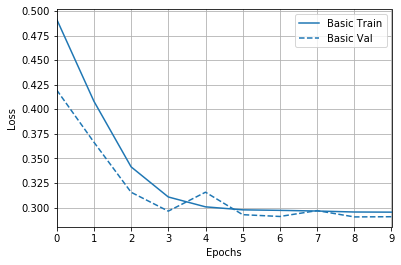

In [393]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")

## EM

In [394]:
em_clusters = GaussianMixture(n_components=7, random_state=10).fit_predict(kiva_features)

In [395]:
X_train, X_test, y_train, y_test = train_test_split(km_clusters, kiva_target, test_size=0.20, random_state=42)

In [396]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [397]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split = 0.15, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split = 0.15, verbose=0)

In [398]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [399]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.473575,0.794853,0.414656,0.819167,0
1,0.402063,0.815882,0.381684,0.819167,1
2,0.340569,0.824588,0.293897,0.852833,2
3,0.299762,0.845059,0.290497,0.855167,3
4,0.292960,0.844294,0.283943,0.855167,4
5,0.291772,0.843735,0.282411,0.834833,5
6,0.290155,0.846412,0.283667,0.855167,6
7,0.289411,0.847647,0.461155,0.852833,7
8,0.289298,0.847147,0.280624,0.855167,8
9,0.288905,0.846441,0.280064,0.855167,9


In [400]:
plotter = tfdocs.plots.HistoryPlotter()

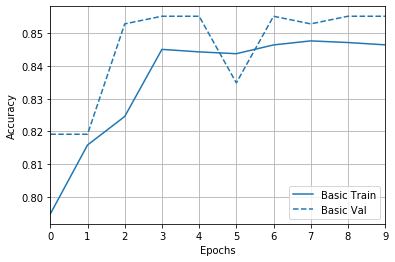

In [401]:

# Plot the learning curve for accuracy
plotter.plot({'Basic': history}, metric = "accuracy")

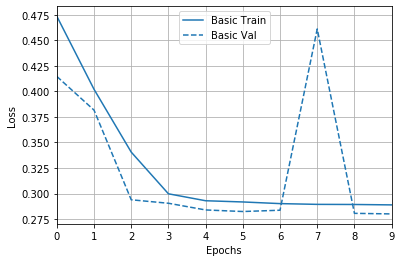

In [402]:

# Plot the learning curve for loss
plotter.plot({'Basic': history}, metric = "loss")